In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scientific Library
import scipy
from scipy import stats
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, ttest_1samp

# Important Machine Learning Library from scikit learn 
import sklearn
from sklearn.model_selection import train_test_split # train and testing
from sklearn.linear_model import LinearRegression, LogisticRegression # model selection
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # Encoding one,two and more
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for logistic Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for linear Regression


# import warnings to stop update warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(filepath_or_buffer="C:/Users/jitsa/Downloads/dataset1-master/empl.csv")
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [3]:
print(df.shape)
print(df.size)
print(df.ndim)

(22, 6)
132
2


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNo      22 non-null     int64  
 1   Name     22 non-null     object 
 2   Age      19 non-null     float64
 3   City     19 non-null     object 
 4   Country  22 non-null     object 
 5   Salary   19 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB
None


In [5]:
df.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [6]:
# droping Name as its won't add mutch for prediction


df1=df.drop(['Name'],axis=1) # drop by rows and save it to new data frame
df1.head(4)

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.0
1,2,31.0,Edmonto,Canada,3900.0
2,3,34.0,Toronto,Canada,8000.0
3,4,26.0,HongKong,Asia,66672.0


In [7]:
# there is no change in original df 
df.head(2)

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0


In [8]:
# making changes in original df
df.drop(['Name'],axis=1,inplace=True) # inplace=True will save the changes in original data

In [9]:
df.columns

Index(['SNo', 'Age', 'City', 'Country', 'Salary'], dtype='object')

In [10]:
# checking 3 sample
df.sample(3)

,SNo,Age,City,Country,Salary
7,8,38.0,Hyderabad,Asia,54666.0
18,20,34.0,Congo,Africa,34432.0
11,13,30.0,NaN,America,34344.0


### Dropping the Nan Value

In [11]:
# will give bollean
df.isnull()

,SNo,Age,City,Country,Salary
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,False,True
5,False,True,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,True,False,False,False


In [12]:
# showing the missing value
df.isnull().sum()

SNo        0
Age        3
City       3
Country    0
Salary     3
dtype: int64

### Visualization using nan data

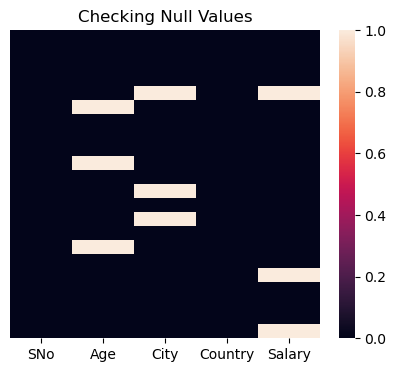

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Checking Null Values")
plt.show()

### Replace the Nan Values

------------------------------------------------
**{NOTE}**

- Replace Int with Mean and Median
- Replace String or Category use Mode


------------------------

In [14]:
df

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.0
1,2,31.0,Edmonto,Canada,3900.0
2,3,34.0,Toronto,Canada,8000.0
3,4,26.0,HongKong,Asia,66672.0
4,5,30.0,NaN,America,NaN
5,6,NaN,HongKong,Asia,30007.0
6,7,43.0,BayArea,America,8300.0
7,8,38.0,Hyderabad,Asia,54666.0
8,9,50.0,newyork,America,67666.0
9,11,NaN,newyork,America,8888.0


**Don't use this as it will replace all nan values in your data set by Age Mean**

- df.replace(to_replace=np.NaN,value=df['Age'].mean(), inplace=True) 


-------------

### HERE you forgot specify df['Column Name'].replace... so on

---------

### By using Replace Method

In [15]:
# use replace by using 
# df['Age'].replace(to_replace=np.NaN,value=df['Age'].mean(), inplace=True)

### By using Fillna Method

In [16]:
# use fillna
df['Age']=df['Age'].fillna((df['Age'].median()))

In [17]:
df['Age'].head(5)

0    28.0
1    31.0
2    34.0
3    26.0
4    30.0
Name: Age, dtype: float64

In [18]:
df['Salary'].replace(np.NaN,df['Salary'].mean())

0     20000.000000
1      3900.000000
2      8000.000000
3     66672.000000
4     33739.947368
5     30007.000000
6      8300.000000
7     54666.000000
8     67666.000000
9      8888.000000
10    66672.000000
11    34344.000000
12    30007.000000
13     8300.000000
14    54666.000000
15    67666.000000
16     8888.000000
17    33739.947368
18    34432.000000
19    34534.000000
20    33451.000000
21    33739.947368
Name: Salary, dtype: float64

In [19]:
ds=df.replace(np.NaN,round(df['Salary'].mean(),2))
ds

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.00
1,2,31.0,Edmonto,Canada,3900.00
2,3,34.0,Toronto,Canada,8000.00
3,4,26.0,HongKong,Asia,66672.00
4,5,30.0,33739.95,America,33739.95
5,6,31.0,HongKong,Asia,30007.00
6,7,43.0,BayArea,America,8300.00
7,8,38.0,Hyderabad,Asia,54666.00
8,9,50.0,newyork,America,67666.00
9,11,31.0,newyork,America,8888.00


## Impute Null values using Simple Imputer

sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)

In [20]:
import sklearn
from sklearn.impute import SimpleImputer

In [21]:
Si=SimpleImputer(missing_values=np.NaN,strategy='mean')

df['Salary']=Si.fit_transform(df['Salary'].values.reshape(-1,1)) # many rows and 1 column

In [22]:
Imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

df['City']=Imputer.fit_transform(df['City'].values.reshape(-1,1)) # values.reshape(Many rows and one column)

**COLUMN REPLACE**

df['Column']

In [24]:
df.isnull().sum()

SNo        0
Age        0
City       0
Country    0
Salary     0
dtype: int64

### After Imputing checking the Null Values

In [25]:
df.isnull().sum().sum()

0

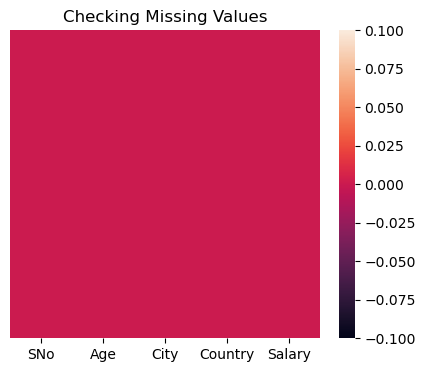

In [26]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Checking Missing Values")
plt.show()

In [27]:
df.head(5)

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.000000
1,2,31.0,Edmonto,Canada,3900.000000
2,3,34.0,Toronto,Canada,8000.000000
3,4,26.0,HongKong,Asia,66672.000000
4,5,30.0,HongKong,America,33739.947368


In [28]:
df['Salary'].shape

(22,)

### Using Label Encoder, We would convert Category to 0,1...........so on

In [31]:
import sklearn
from sklearn.preprocessing import LabelEncoder

# create instance
le=LabelEncoder()

#df['City']=le.fit_transform(df['City']) 

# running loop at once to convert all at a time.
list1=['City','Country']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str)) # astype(str) will consider all as string

In [32]:
df.head(4)

,SNo,Age,City,Country,Salary
0,1,28.0,8,3,20000.0
1,2,31.0,3,3,3900.0
2,3,34.0,8,3,8000.0
3,4,26.0,5,2,66672.0


In [33]:
# loading column names

df.columns

Index(['SNo', 'Age', 'City', 'Country', 'Salary'], dtype='object')

In [38]:
df['City'].unique()

array([8, 3, 5, 1, 6, 9, 2, 0, 4, 7])

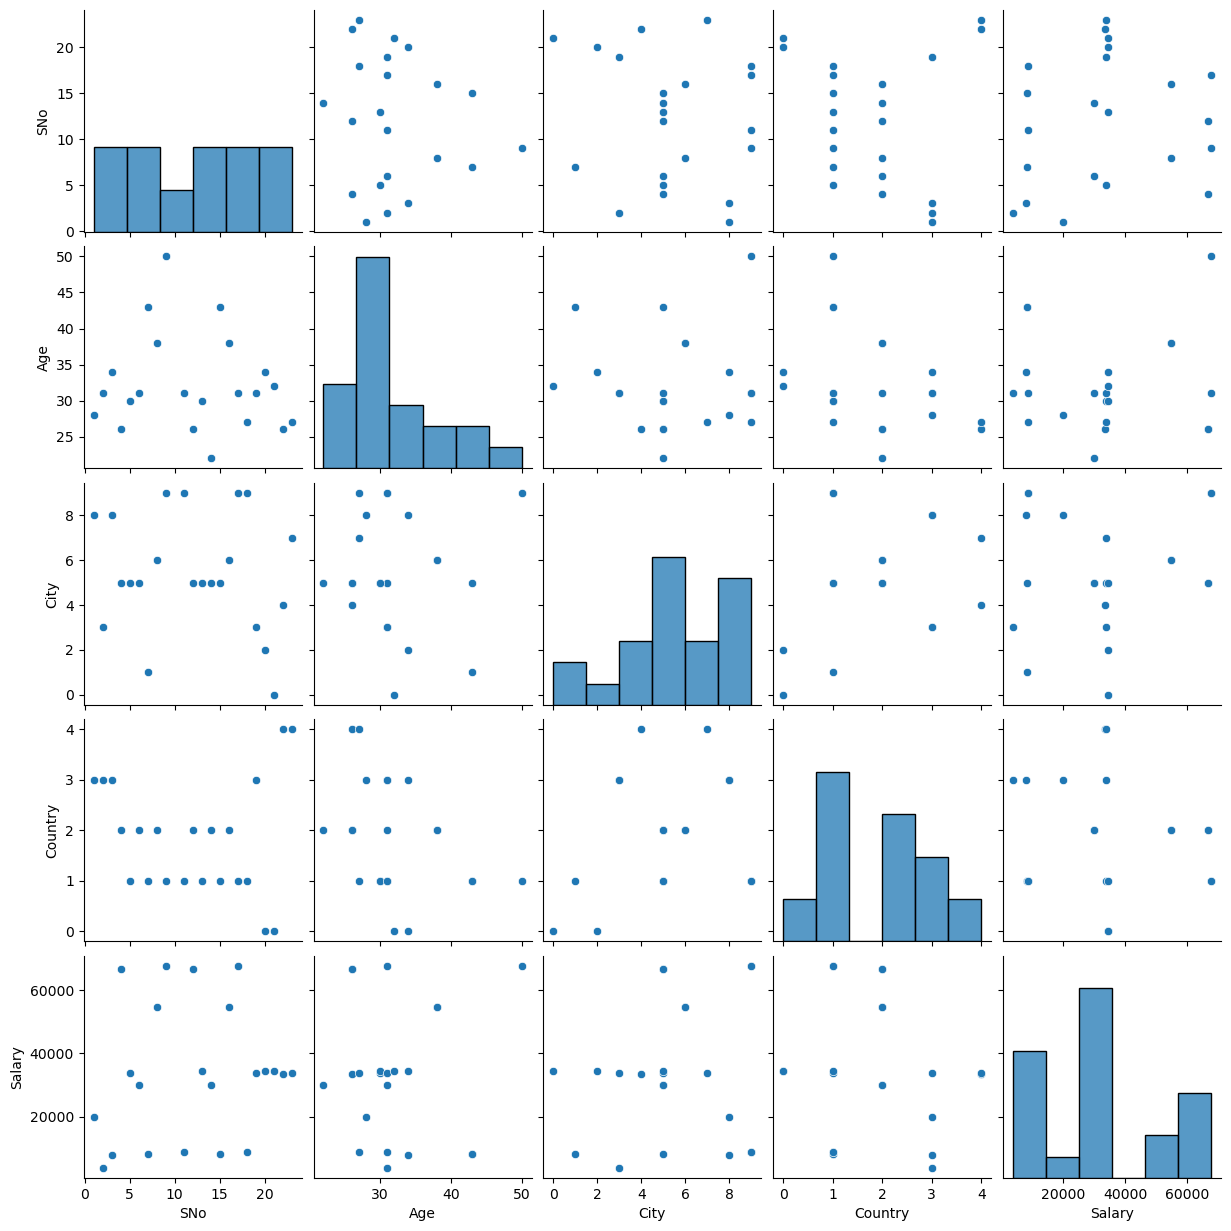

In [39]:
sns.pairplot(df)

In [41]:
df['Age'].quantile(0.25)

27.25

In [48]:
scipy.stats.percentileofscore(a=df['Age'],score=27.25)

27.272727272727273

In [49]:
pd.get_dummies(df['City'])

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1


## Concrete_Cement DataSet

- Concrete data.csv